## 信頼度95%

1. サイコロを20回振って，平均と標準偏差を求め，95%の信頼区間を作る。
2. この信頼区間を100個作る。
3. 真の平均3.5を含む信頼区間はだいたい100個中95個（信頼度95%）

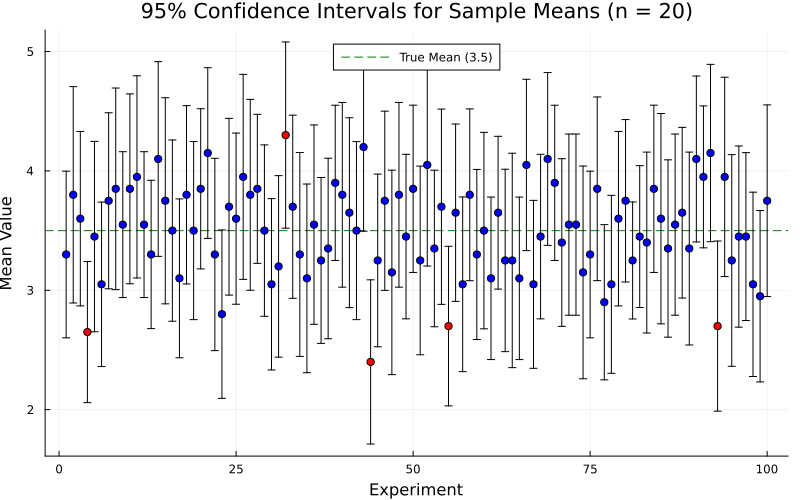

In [8]:
using Random
using Statistics
using Distributions
using Plots

# サンプル数
n = 20

# 実験回数
num_experiments = 100

# 真の平均
true_mean = 3.5

# 平均と信頼区間を格納する配列の初期化
means = zeros(num_experiments)
conf_intervals = zeros(num_experiments, 2)

# 信頼区間に真の平均が含まれているかどうかのフラグ配列
contains_true_mean = trues(num_experiments)

# 実験を実行
for i in 1:num_experiments
    # 一様分布から n 個のサンプルを生成
    X = [rand(1:6) for _ in 1:n]
    X̄ = mean(X)
    σ̄ = std(X, corrected=true)
    N = Normal(X̄, σ̄/sqrt(n))
    
    # 平均と信頼区間を格納
    means[i] = X̄
    conf_intervals[i, :] .= (quantile(N, 0.025), quantile(N, 0.975))
    
    # 信頼区間に真の平均が含まれているかどうかをチェック
    contains_true_mean[i] = conf_intervals[i, 1] <= true_mean <= conf_intervals[i, 2]
end

# プロットの初期化
plot(size=(800, 500), legend=:top)
hline!([true_mean], linestyle=:dash, label="True Mean (3.5)", color=:green)

# 各実験のデータをプロット
for i in 1:num_experiments
    color = contains_true_mean[i] ? :blue : :red
    scatter!([i], [means[i]], yerr=([means[i] - conf_intervals[i, 1]], [conf_intervals[i, 2] - means[i]]), color=color, label=false)
end

xlabel!("Experiment")
ylabel!("Mean Value")
title!("95% Confidence Intervals for Sample Means (n = $n)")